POLYNOMIAL INTERPOLATION

In [102]:
import matplotlib.pyplot as plt
import math as m
import numpy as np

In [107]:
def p(x,X):#function to find the product terms
    p=1
    for i in X:
        p *=x-i
    return p

In [108]:
def newtinterpolation(f,x,X):
    n=len(X)
    if n==1:
        return f(X[0])
    else:
        xm=X[-1]
        X=X[:-1]
        return newtinterpolation(f,x,X)+((f(xm)-newtinterpolation(f,xm,X))/p(xm,X)*p(x,X))

In [109]:
def f(x): #defining function e^-x
    return m.exp(-x)

In [110]:
points=[0.1,0.5,0.6,0.8] #data points
N=100
X=[]
for i in range(0,N+1):
    fr=i/100
    X.append(fr)

approxpoly=[]
for a in X:
    approxpoly.append(newtinterpolation(f,a,points))

In [111]:
realval=[] #list of real values and interpolated values
interpolval=[]
for i in X:
    realval.append(f(i))
for k in points:
    interpolval.append(f(k))
    

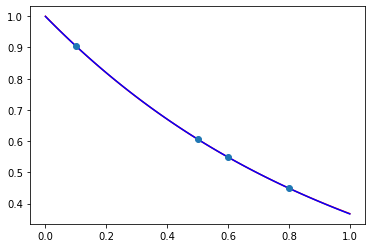

In [112]:
#plotting real and interpolated values
plt.plot(X,realval,'r')
plt.plot(X,approxpoly,'b')
plt.plot(points,interpolval,'o')

LAGRANGE INTERPOLATION

In [251]:
def lagrange(xp,X):#xp-interpolation point
    yp = 0#set interpolated value to 0
    n=len(X) #no. of data points
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p *= (xp - X[j])/(X[i] - X[j])
        yp += p * y[i] 
    return yp

In [252]:
X=[0,1,2,5] #data points
y=[2,3,12,147]
xp=3
print('the value at',xp,'is',lagrange(xp,X))


the value at 3 is 35.0


NEWTON DIVIDED DIFFERENCE INTERPOLATING POLYNOMIAL

In [188]:
def prod(i, value, x): #function for product terms
    p = 1; 
    for j in range(i): 
        p = p * (value - x[j]); 
    return p

In [202]:
def newtondiv(x,X, y, n,t):
    
  
    for i in range(1, n): 
        for j in range(n - i): 
            y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) /
                                     (X[j] - X[i + j]));
    
    s = y[0][0]; 
  
    for i in range(1, n):
        s = s + (prod(i,x, X) * y[0][i]); 
    
    if t==1:
        for i in range(n): 
            for j in range(n - i): 
                print(round(y[i][j], 4), "\t", 
                               end = " "); 
  
            print(" "); 
    
    elif t==0:
        pass
   
    return s
     

In [203]:
n = 5; #no. of points
y = [[0 for i in range(n)] 
        for j in range(n)]; 
X = [ -2,0,1,4,5 ]; #x values
#creating table
y[0][0] = 9;  
y[1][0] = 1; 
y[2][0] = 6; 
y[3][0] = 57;
y[4][0]=86;
x = 2;   
print("\nValue at", x, "is",
        newtondiv(x, X, y, n,1))  

9 	 -4.0 	 3.0 	 -0.0 	 -0.0 	  
1 	 5.0 	 3.0 	 -0.0 	  
6 	 17.0 	 3.0 	  
57 	 29.0 	  
86 	  

Value at 2 is 17.0


NEWTON GREGORY FORWARD INTERPOLATING POLYNOMIAL

In [162]:
def fact(n): #function to clac factorial
    f = 1;
    for i in range(2, n + 1):
        f *= i;
    return f
def prod(p, n): #product terms
 
    prod = p;
    for i in range(1, n):
        prod *= (p - i);
    return prod

In [163]:
def newtonf(x,p,n):
    
    p = (x - X[0]) / (X[1] - X[0]);
 

    for i in range(1, n):
        for j in range(n - i):
            y[j][i] = y[j + 1][i - 1] - y[j][i - 1];
 

    for i in range(n):
        print(X[i], end = "\t");
        for j in range(n - i):
            print(y[i][j], end = "\t");
        print("");
        
    s = y[0][0];
    for i in range(1,n):
        s = s + (prod(p,i) * y[0][i]) / fact(i);
    
    return s

 


In [164]:
n = 4;#no. of points
X = [ 45, 50, 55, 60 ];#x values
     
# y values in tabular form
y = [[0 for i in range(n)]
        for j in range(n)];
y[0][0] = 0.7071;
y[1][0] = 0.7660;
y[2][0] = 0.8192;
y[3][0] = 0.8660;
x = 52;

print("\nValue at", x,
      "is",newtonf(x,p,n));

45	0.7071	0.05890000000000006	-0.005700000000000038	-0.0007000000000000339	
50	0.766	0.053200000000000025	-0.006400000000000072	
55	0.8192	0.04679999999999995	
60	0.866	

Value at 52 is 0.7880032


NEWTON GREGORY BACKWARD INTERPOLATING POLYNOMIAL

In [166]:
def prod(p, n): #product terms
 
    prod = p;
    for i in range(1, n):
        prod *= (p + i);
    return prod

In [170]:
def newtonb(x,p,n):
    p = (x - X[n - 1]) / (X[1] - X[0])
 

    for i in range(1, n):
        for j in range(n - 1,i,-1):
            y[j][i] = y[j][i - 1] - y[j - 1][i - 1];
 

    for i in range(n):
        print(X[i], end = "\t");
        for j in range(i+1):
            print(y[i][j], end = "\t");
        print("");
        
    s = y[n-1][0];
    for i in range(1,n):
        s = s + (prod(p,i) * y[n-1][i]) / fact(i);
    
    return s
    

In [171]:
n = 4;#no. of points
X = [ 45, 50, 55, 60 ];#x values
     
#y values in tabular form
y = [[0 for i in range(n)]
        for j in range(n)];
y[0][0] = 0.7071;
y[1][0] = 0.7660;
y[2][0] = 0.8192;
y[3][0] = 0.8660;
x = 52;

print("\nValue at", x,
      "is",newtonb(x,p,n));

45	0.7071	
50	0.766	0	
55	0.8192	0.053200000000000025	0	
60	0.866	0.04679999999999995	-0.006400000000000072	0	

Value at 52 is 0.788048
